# Лабораторная работа 4 Курбанов Джурат AIN-1-21


## Набор данных по распознованию вин

In [159]:
from sklearn.datasets import load_wine
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

wine = load_wine()

## Изучение данных

In [160]:

print(wine.DESCR)

data = pd.DataFrame(wine.data, columns=wine.feature_names)


data.head()

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


## Разделение данных на обучающий и тестовые наборы

In [161]:
from sklearn.model_selection import train_test_split

X = wine.data
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

## Иследование данных с помощью визуализации

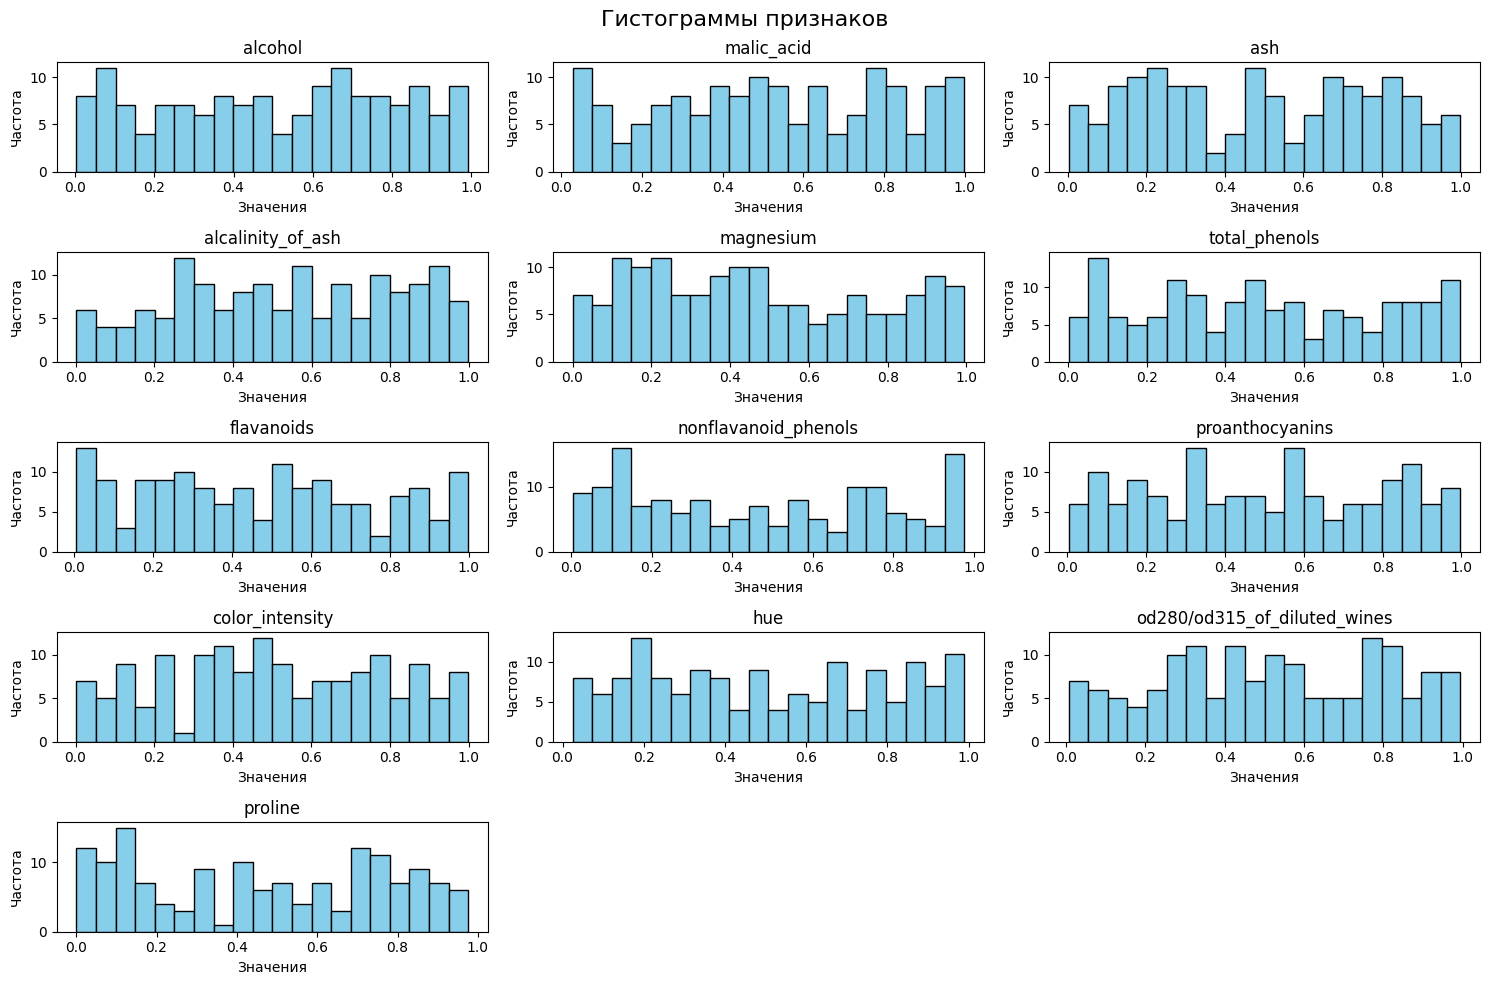

In [162]:
import matplotlib.pyplot as plt
import numpy as np


data = np.random.rand(150, 13)
wine_feature_names = ["Feature " + str(i) for i in range(1, 14)]

num_features = len(wine_feature_names)
rows = num_features // 3 + 1

fig, axes = plt.subplots(rows, 3, figsize=(15, 10))
fig.suptitle("Гистограммы признаков", fontsize=16)

for i, feature in enumerate(wine_feature_names):
    ax = axes[i // 3, i % 3]
    ax.hist(data[:, i], bins=20, edgecolor='black', color='skyblue')
    ax.set_title(wine.feature_names[i])
    ax.set_xlabel("Значения")
    ax.set_ylabel("Частота")


for i in range(num_features, rows * 3):
    fig.delaxes(axes[i // 3, i % 3])

plt.tight_layout()
plt.show()









# Построение моделей k-ближайших соседей

In [107]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train, y_train)

KNeighborsClassifier()

## Прогноз модели

In [146]:
y_pred = knn.predict(X_test)
y_pred


array([0, 0, 1, 0, 1, 0, 1, 2, 2, 0, 2, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       2, 1, 1, 1, 1, 2, 1, 0, 0, 1, 0, 0, 0, 0, 2, 2, 2, 1, 0, 1, 1, 2,
       1, 0, 2, 1, 2, 0, 1, 0, 0, 2, 1, 2, 0, 0, 1, 0, 1, 1, 2, 2, 0, 0,
       0, 2, 2, 0, 0, 2])

## Правильность на тестовом наборе

In [147]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(report)

Accuracy: 0.69
              precision    recall  f1-score   support

           0       0.86      0.92      0.89        26
           1       0.68      0.63      0.65        27
           2       0.47      0.47      0.47        19

    accuracy                           0.69        72
   macro avg       0.67      0.68      0.67        72
weighted avg       0.69      0.69      0.69        72



In [ ]:
## Кривая обучения

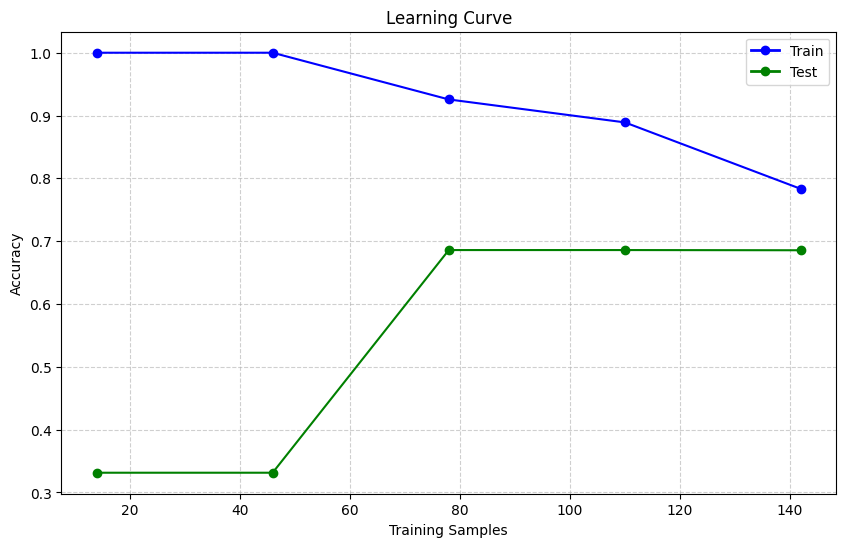

In [148]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(KNeighborsClassifier(n_neighbors=5), X, y, cv=5)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))


plt.plot(train_sizes, train_mean, label="Train", marker='o', linestyle='-', color='b')
plt.plot(train_sizes, test_mean, label="Test", marker='o', linestyle='-', color='g')

plt.title("Learning Curve")
plt.xlabel("Training Samples")
plt.ylabel("Accuracy")


plt.grid(True, linestyle='--', alpha=0.6)


plt.legend(loc="upper right")


legend = plt.legend()
legend.get_lines()[0].set_lw(2)
legend.get_lines()[1].set_lw(2)

plt.show()


## Вывод
После выполнения кода модель показала точность в 0.69 или же 69%,что является не очень хорошим результатом.Но при настройке параметров можно улучшить результат.Тем не менее,исходя из результата,можно сделать вывод ,что к данному датасету метод k-средних не походит.

## Набор данных по раку груди висконсин (диагностический)

In [183]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

breast_cancer = load_breast_cancer()

## Изучение данных

In [184]:
print(breast_cancer.DESCR)
data = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)

data.head()

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Разделение данных на обучающий и тестовые наборы

In [190]:
from sklearn.model_selection import train_test_split

X = breast_cancer.data
y = breast_cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

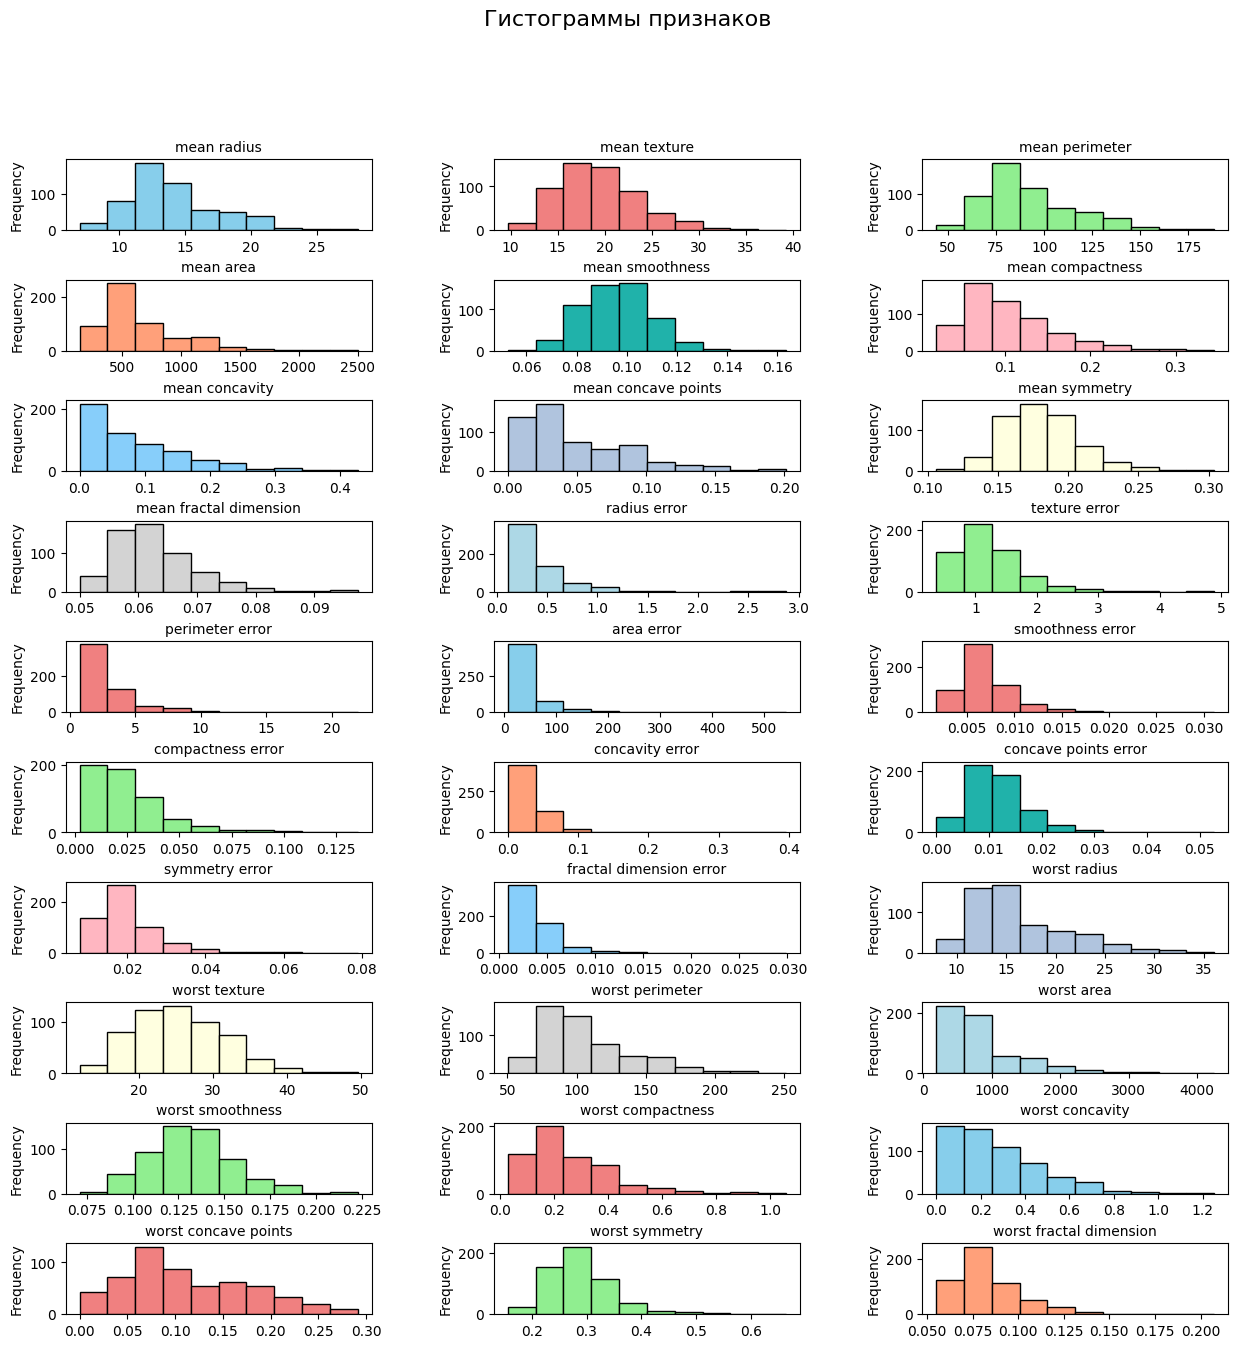

In [191]:
import matplotlib.pyplot as plt
import pandas as pd
import itertools
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()
data = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)

num_features = len(data.columns)
num_cols = 3
num_rows = (num_features + num_cols - 1) // num_cols

colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'lightseagreen', 'lightpink', 'lightskyblue', 'lightsteelblue', 'lightyellow', 'lightgray', 'lightblue', 'lightgreen', 'lightcoral']
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
fig.suptitle("Гистограммы признаков", fontsize=16)

colors_cycle = itertools.cycle(colors)

for i, feature in enumerate(data.columns, start=1):
    ax = axes[(i - 1) // num_cols, (i - 1) % num_cols]
    data[feature].plot(kind='hist', title=feature, edgecolor='k', ax=ax, color=next(colors_cycle))
    ax.title.set_fontsize(10)

plt.subplots_adjust(wspace=0.4, hspace=0.7)
plt.show()







    ## Построение модели k-ближайших соседей

In [170]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=15)


knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

## Прогноз модели

In [171]:
y_pred = knn.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0])

## Оценка качества

In [172]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(report)

Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



## Кривая обучения

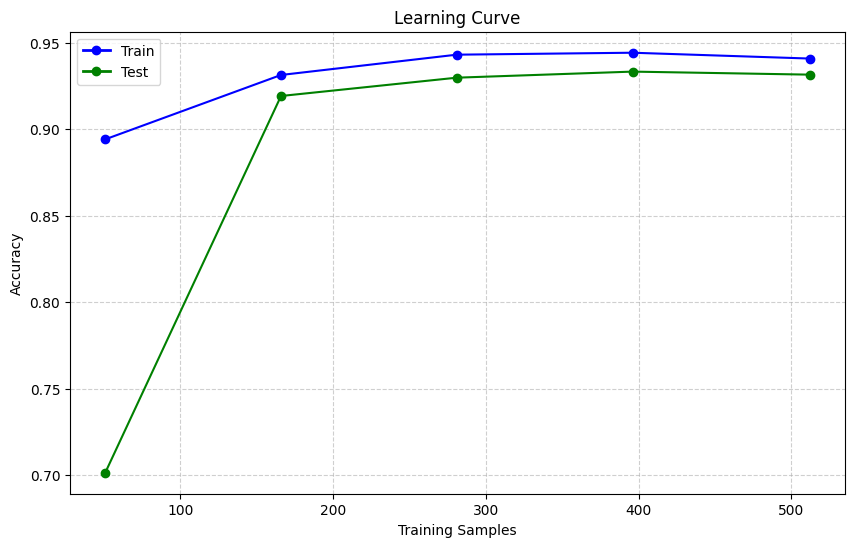

In [173]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(KNeighborsClassifier(n_neighbors=10), X, y, cv=10)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))


plt.plot(train_sizes, train_mean, label="Train", marker='o', linestyle='-', color='b')
plt.plot(train_sizes, test_mean, label="Test", marker='o', linestyle='-', color='g')

plt.title("Learning Curve")
plt.xlabel("Training Samples")
plt.ylabel("Accuracy")


plt.grid(True, linestyle='--', alpha=0.6)


plt.legend(loc="upper right")


legend = plt.legend()
legend.get_lines()[0].set_lw(2)
legend.get_lines()[1].set_lw(2)

plt.show()


## Вывод
Мы получили точность предсказания 0.96.Модель правильно классифицировала 96% тестовых данных.Сравнивая результаты предсказания набора данных по распознованию вин с точностью предсказания модели для набора данных по раку груди Висконсин (диагностический),мы можем сделать вывод,что к данному датасету метод к-средних подходит.


## Оптическое распознавание набора данных рукописных цифр

In [222]:
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

digits = load_digits()

## Изучение данных


In [223]:

print(digits.DESCR)

data = pd.DataFrame(digits.data)

data.head()

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


## Разделение данных на обучающий и тестовые наборы

In [224]:
from sklearn.model_selection import train_test_split

X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

## Исследование данных с помощью визуализации

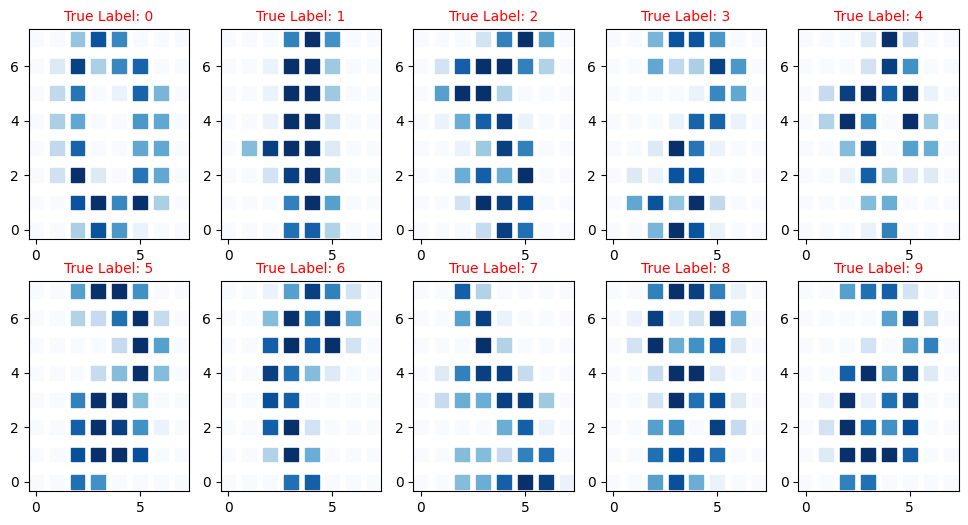

In [225]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(2, 5, figsize=(12, 6))

for i, ax in enumerate(axes.flat):
    image = digits.images[i]
    target = digits.target[i]
    x, y = np.meshgrid(range(8), range(8))
    ax.scatter(x, y, c=image, cmap='Blues', marker='s', s=100)
    ax.set_title(f"True Label: {target}", fontsize=10, color='red')

plt.show()






## Построение модели k-ближайших соседей

In [226]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [227]:
y_pred = knn.predict(X_test)
y_pred

array([6, 9, 3, 7, 2, 2, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 9, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 0, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 7, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 3, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 7, 7, 2, 9, 0, 4, 5, 3, 6, 5, 9, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 1, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 4, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 9, 1, 4, 7, 6, 8, 8, 5,
       5, 1, 6, 2, 8, 8, 9, 5, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

## Оценка качества модели


In [228]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(report)

Accuracy: 0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       0.95      0.99      0.97        72
           2       0.99      1.00      0.99        66
           3       0.99      0.97      0.98        71
           4       0.99      1.00      0.99        78
           5       0.99      0.95      0.97        83
           6       0.99      1.00      0.99        69
           7       0.96      1.00      0.98        71
           8       0.98      0.92      0.95        65
           9       0.96      0.95      0.95        77

    accuracy                           0.98       719
   macro avg       0.98      0.98      0.98       719
weighted avg       0.98      0.98      0.98       719



## Матрица ошибок

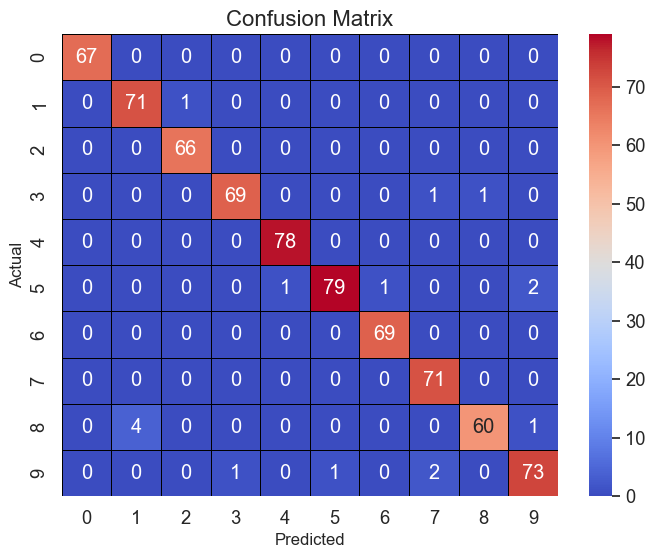

In [232]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)


sns.set(font_scale=1.2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5, linecolor="black")


plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)

plt.show()




## Вывод
Мы получили точность предсказания 0.96.Модель правильно классифицировала 96% тестовых данных.В моем случае точность предсказания модели для набора данных оптического распознавания рукописных цифр показала наилучший результат 99%.Что говорит о том, модель подходит для задачи распознавания рукописных цифр.
Однако, чтобы сделать окончательный вывод о качестве моделей, необходимо провести более глубокий анализ и оценку их качества.